In [6]:
# !pip3 install graphviz
# !pip3 install dask
# !pip install "dask[complete]"
# !pip3 install toolz
# !pip3 install cloudpickle



In [7]:
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

#!pip3 install folium
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
#!pip install gpxpy
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os


# to install xgboost: 
# !conda install py-xgboost --yes
#!pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")



# Data Information


* Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
* The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 



## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the <b>time period between Jan - Mar 2015 & Jan - Mar 2016</b>

In [8]:
jan_2015_data = dd.read_csv('../input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')
jan_2015_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [9]:
# jan_2015_data.size.compute()
# number of records = 242230734 Huge records

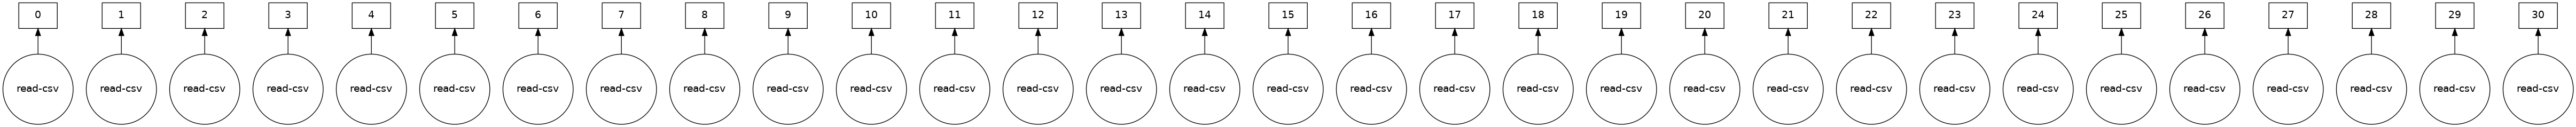

In [10]:
# Dask data frame visualization
jan_2015_data.visualize()

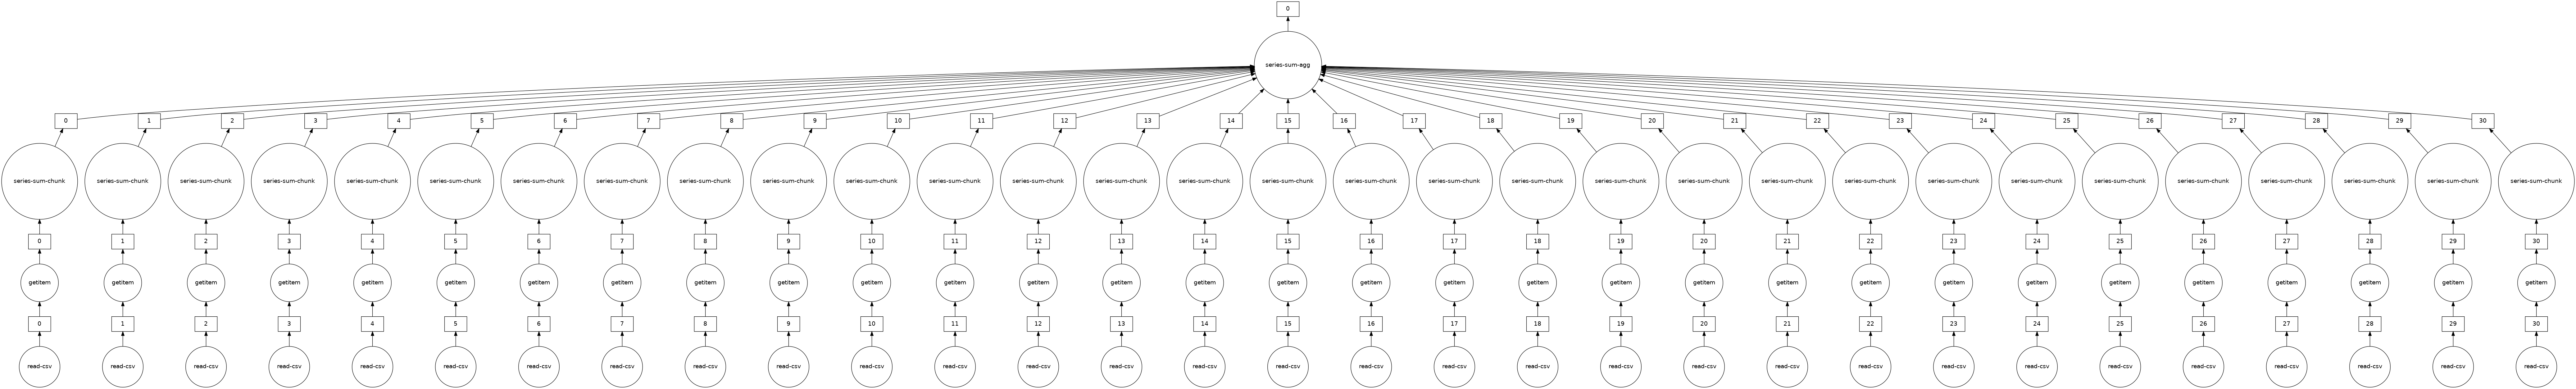

In [11]:
# Dask Data Frame visualization
jan_2015_data.fare_amount.sum().visualize()

## Features in the dataset:
<table border="1">
        <tr>
            <th>Field Name</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>VendorID</td>
            <td>
            A code indicating the TPEP provider that provided the record.
            <ol>
                <li>Creative Mobile Technologies</li>
                <li>VeriFone Inc.</li>
            </ol>
            </td>
        </tr>
        <tr>
            <td>tpep_pickup_datetime</td>
            <td>The date and time when the meter was engaged.</td>
        </tr>
        <tr>
            <td>tpep_dropoff_datetime</td>
            <td>The date and time when the meter was disengaged.</td>
        </tr>
        <tr>
            <td>Passenger_count</td>
            <td>The number of passengers in the vehicle. This is a driver-entered value.</td>
        </tr>
        <tr>
            <td>Trip_distance</td>
            <td>The elapsed trip distance in miles reported by the taximeter.</td>
        </tr>
        <tr>
            <td>Pickup_longitude</td>
            <td>Longitude where the meter was engaged.</td>
        </tr>
        <tr>
            <td>Pickup_latitude</td>
            <td>Latitude where the meter was engaged.</td>
        </tr>
        <tr>
            <td>RateCodeID</td>
            <td>The final rate code in effect at the end of the trip.
            <ol>
                <li> Standard rate </li>
                <li> JFK </li>
                <li> Newark </li>
                <li> Nassau or Westchester</li>
                <li> Negotiated fare </li>
                <li> Group ride</li>
            </ol>
            </td>
        </tr>
        <tr>
            <td>Store_and_fwd_flag</td>
            <td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br> aka “store and forward,” because the vehicle did not have a connection to the server.<br><br>
                Y= store and forward trip<br>
                N= not a store and forward trip<br>
            </td>
        </tr>
        <tr>
            <td>Dropoff_longitude</td>
            <td>Longitude where the meter was disengaged.</td>
        </tr>
        <tr>
            <td>Dropoff_ latitude</td>
            <td>Latitude where the meter was disengaged.</td>
        </tr>
        <tr>
            <td>Payment_type</td>
            <td>A numeric code signifying how the passenger paid for the trip.
            <ol>
                <li> Credit card </li>
                <li> Cash </li>
                <li> No charge </li>
                <li> Dispute</li>
                <li> Unknown </li>
                <li> Voided trip</li>
            </ol>
            </td>
        </tr>
        <tr>
            <td>Fare_amount</td>
            <td>The time-and-distance fare calculated by the meter.</td>
        </tr>
        <tr>
            <td>Extra</td>
            <td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
        </tr>
        <tr>
            <td>MTA_tax</td>
            <td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
        </tr>
        <tr>
            <td>Improvement_surcharge</td>
            <td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
        </tr>
        <tr>
            <td>Tip_amount</td>
            <td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
        </tr>
        <tr>
            <td>Tolls_amount</td>
            <td>Total amount of all tolls paid in trip.</td>
        </tr>
        <tr>
            <td>Total_amount</td>
            <td>The total amount charged to passengers. Does not include cash tips.</td>
        </tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
<i> We want to find number of pickups, give location (longitude and latitude) and time, in the query region and surrouding region </i>
<br>
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.


# Performance metrics
1. Mean Absolute percentage error.


### $\frac{100}{N} \sum_{i=1}^{N}\frac{|p_t-p^{\prime}_t|}{p_t}$

|Location | time | y_true | y_pred |      error    |           MAP               |
|---------|------|--------|--------|---------------|-----------------------------|
|         | t    | p_t    |p_t_pred| p_t - p_t_pred| (p_t - p_t_pred /p_t) 100   |
|    L1   | t    | 100    | 102    |  -2           |   2 %                       |
|    L2   | t    | 10     | 12     |  -2           |   20 %                      |

    We can clearly see from the table that mean absolute percentage  error(MAPE) is very different even if actual error is same, we want to optimze for Mean absolute percentage error.

# Data Cleaning and Data Processing

    In this section we will be do some useful univariate analysis and removing outlier/illegitimate values which may be caused due to some error
    We will use interactive  visualization  wherever possible

In [12]:
# features
jan_2015_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

### 1.Pickup latitude and Longitude
    It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004)
    
    Every cordicated not within the limit are not considerd for our analysis, as we are only concerned with pickups which originates within Newyork City.


In [13]:
# Outlier pickups

outlier_pickups = jan_2015_data[((jan_2015_data['pickup_latitude'] <= 40.5774) | (jan_2015_data['pickup_latitude'] >= 40.9176) | \
                               (jan_2015_data['pickup_longitude'] <= -74.15) | (jan_2015_data['pickup_longitude'] >= -73.7004))]
outlier_pickups.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
31,2,2015-01-15 19:05:43,2015-01-15 19:05:44,2,0.01,0.0,0.0,5,N,0.0,0.0,1,60.0,0.0,0.0,0.00,0.00,0.3,60.30
61,1,2015-01-04 13:44:52,2015-01-04 13:56:49,1,2.50,0.0,0.0,1,N,0.0,0.0,1,11.0,0.0,0.5,2.35,0.00,0.0,14.15
66,2,2015-01-04 13:44:52,2015-01-04 13:49:03,1,0.85,0.0,0.0,1,N,0.0,0.0,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
157,1,2015-01-15 09:47:00,2015-01-15 10:00:07,1,1.00,0.0,0.0,1,N,0.0,0.0,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80
159,1,2015-01-15 09:47:02,2015-01-15 10:17:47,3,8.30,0.0,0.0,1,N,0.0,0.0,1,27.5,0.0,0.5,10.00,5.33,0.3,43.63


In [14]:

map_nyc  = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_pickups.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_nyc)
map_nyc

**Observation :**
    
       As you can see above that there are some points just outside the boundary, but there are a few that are in either Pennsylvania state, some of in atlentic ocean, some of the location in very far state from newyork

### 2. Dropoff Latitude and Longitude 
    
    It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004)
    
    Every cordicated not within the limit are not considerd for our analysis, as we are only concerned with dropoff  within Newyork City.

In [15]:
# Outlier pickups

outlier_dropoffs = jan_2015_data[((jan_2015_data['dropoff_latitude'] <= 40.5774) | (jan_2015_data['dropoff_latitude'] >= 40.9176) | \
                               (jan_2015_data['dropoff_longitude'] <= -74.15) | (jan_2015_data['dropoff_longitude'] >= -73.7004))]
outlier_dropoffs.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
31,2,2015-01-15 19:05:43,2015-01-15 19:05:44,2,0.01,0.00000,0.000000,5,N,0.000000,0.000000,1,60.0,0.0,0.0,0.00,0.00,0.3,60.30
61,1,2015-01-04 13:44:52,2015-01-04 13:56:49,1,2.50,0.00000,0.000000,1,N,0.000000,0.000000,1,11.0,0.0,0.5,2.35,0.00,0.0,14.15
66,2,2015-01-04 13:44:52,2015-01-04 13:49:03,1,0.85,0.00000,0.000000,1,N,0.000000,0.000000,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
119,1,2015-01-26 12:41:21,2015-01-26 13:03:26,2,16.30,-73.99839,40.761681,3,N,-74.177238,40.695042,1,60.5,0.0,0.0,15.30,15.75,0.3,91.85
157,1,2015-01-15 09:47:00,2015-01-15 10:00:07,1,1.00,0.00000,0.000000,1,N,0.000000,0.000000,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80


In [16]:
map_nyc  = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_dropoffs.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['dropoff_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_nyc)
map_nyc

    Observation:- The observations here are similar to those obtained while analysing pickup latitude and longitude

### 3. Trip Duration

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [17]:
jan_2015_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [18]:
def convert_to_unix_timestamp(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())


In [19]:


"""
Returned Columns:
    # 1. passenger_count
    # 2. trip_distance
    # 3. pickup_longitude
    # 4. dropoff_latitude
    # 5. dropoff_longitude
    # 6. pickup_latitude
    # 7. total_amount : total paid fair amount
    # 8. trip_times :  duration of each trip
    # 9. pickup_times : pickup time converted into unix time 
    # 10.drop times: drop time converted to unix time
    # 11.Speed : velocity of each trip
"""

def create_dataframe_with_trip_times(df):
    
    duration_df = jan_2015_data[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    # get pickup values in unix time
    pickup_times = [convert_to_unix_timestamp(value) for value in duration_df['tpep_pickup_datetime'].values]
    # get dropoff values in unix time
    drop_times = [convert_to_unix_timestamp(value) for value in duration_df['tpep_dropoff_datetime'].values]
    # drop times and pickup times devide by 60 will give minutes
    trip_times = (np.array(drop_times) - np.array(pickup_times))/ float(60) 
    result_df = df[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    result_df['trip_times'] = trip_times
    result_df['pickup_times'] = pickup_times
    result_df['drop_times'] = drop_times
    # velocity = distance/ duration
    result_df['Speed'] = 60*(result_df['trip_distance']/result_df['trip_times'])
    
    return result_df
jan_month_with_trip_duration = create_dataframe_with_trip_times(jan_2015_data)

In [20]:
jan_month_with_trip_duration.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378


In [21]:
import math
def get_percentile( df, feature,start_range=0, end_range=100,increment=1):
    """
    start_range = start percenile  >=0 
    end_range = end percentile <= 100
    df = dataframe
    feature = feature on which percentile will be calculated
    """
    if feature not in df.columns:
        raise Exception("feature not present in dataframe")
    for i in range(start_range,end_range,increment):
        sorted_df = np.sort(df[feature].values, axis=None)
        percentile_index = int(len(sorted_df) * float(i/100))
        if i ==100:
            print("{}th percentile value for {}  : {}".format(i,feature, sorted_df[-1]))
        else: 
            print("{}th percentile value for {}  : {}".format(i,feature,sorted_df[percentile_index] ))


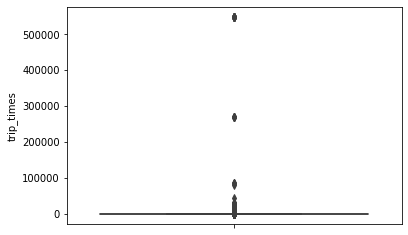

In [22]:
# Let's plot box plot to see outliers in trip times
%matplotlib inline
sns.boxplot(y="trip_times", data =jan_month_with_trip_duration)
plt.show()

    Box plot is  not interpretable so we will see different percentile value for trip times to detect outliers
    

In [23]:

get_percentile( jan_month_with_trip_duration, 'trip_times',start_range=0, end_range=101,increment=10)

0th percentile value for trip_times  : -1211.0166666666667
10th percentile value for trip_times  : 3.8333333333333335
20th percentile value for trip_times  : 5.383333333333334
30th percentile value for trip_times  : 6.816666666666666
40th percentile value for trip_times  : 8.3
50th percentile value for trip_times  : 9.95
60th percentile value for trip_times  : 11.866666666666667
70th percentile value for trip_times  : 14.283333333333333
80th percentile value for trip_times  : 17.633333333333333
90th percentile value for trip_times  : 23.45
100th percentile value for trip_times  : 548555.6333333333


In [24]:
print("Percentile value between 91 to 100 for trip time")
get_percentile( jan_month_with_trip_duration, 'trip_times',start_range=91, end_range=101,increment=1)


Percentile value between 91 to 100 for trip time
91th percentile value for trip_times  : 24.35
92th percentile value for trip_times  : 25.383333333333333
93th percentile value for trip_times  : 26.55
94th percentile value for trip_times  : 27.933333333333334
95th percentile value for trip_times  : 29.583333333333332
96th percentile value for trip_times  : 31.683333333333334
97th percentile value for trip_times  : 34.46666666666667
98th percentile value for trip_times  : 38.71666666666667
99th percentile value for trip_times  : 46.75
100th percentile value for trip_times  : 548555.6333333333


In [25]:
#removing data based on percentile analysis and TLC regulations ( Maximum 720 Minutes [12 hours])
frame_with_durations_modified=jan_month_with_trip_duration[(jan_month_with_trip_duration.trip_times>1) & (jan_month_with_trip_duration.trip_times<720)]
frame_with_durations_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378


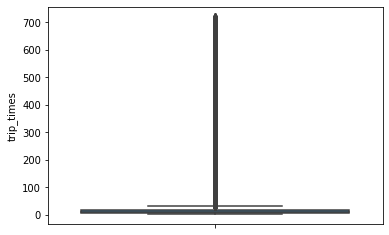

In [26]:
# Box plot after removing constrained value and outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

    even after removing outliers Box plot is not interpretable so lets plot the pdf of trip duration
    

In [27]:
# # sns.kdeplot(data=frame_with_durations_modified, x="trip_times")
# sns.FacetGrid(frame_with_durations_modified,size=6) \
#       .map(sns.kdeplot,"trip_times") \
#       .add_legend();
# plt.show();

* density plot looks like skewed distribution, we will **plot log(trip_duration)** and see how log(trip_duration look likes), If **trip duration follows log normal distribution** then **log(trip_duration) will likely follow normal distribution**, which can be useful in model building.

In [28]:
#converting the values to log-values to check for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]
#pdf of log-values
# sns.FacetGrid(frame_with_durations_modified,size=6) \
#       .map(sns.kdeplot,"log_times") \
#       .add_legend();
# plt.show();

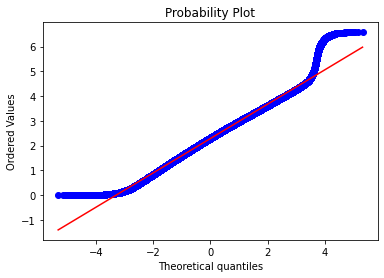

In [29]:
# Q-Q plot for validation, how trip_duration distribution is daviating from normal distribution
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

#### Observation
    Q-Q plot clearly shows that log(trip_duration) does not follow normal distribution.
    

### 4. Speed

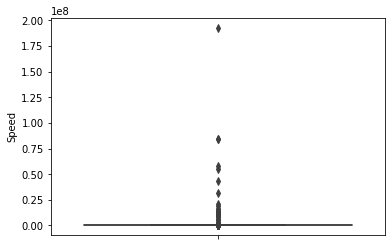

In [30]:
sns.boxplot(y='Speed',data=frame_with_durations_modified )
plt.show()

In [31]:
# it's not easy to interpret the box plot results so let's print percentile values for speed in 10 interval
print("Percentile value between 0 to 100 for speed time")
get_percentile( frame_with_durations_modified, 'Speed',start_range=0, end_range=101,increment=10)


Percentile value between 0 to 100 for speed time
0th percentile value for Speed  : 0.0
10th percentile value for Speed  : 6.409495548961425
20th percentile value for Speed  : 7.80952380952381
30th percentile value for Speed  : 8.929133858267717
40th percentile value for Speed  : 9.98019801980198
50th percentile value for Speed  : 11.06865671641791
60th percentile value for Speed  : 12.286689419795222
70th percentile value for Speed  : 13.796407185628745
80th percentile value for Speed  : 15.963224893917962
90th percentile value for Speed  : 20.186915887850468
100th percentile value for Speed  : 192857142.85714284


In [32]:
# Let's check 91 to 100th percentile for speed
print("Percentile value between 91 to 100 for speed time")
get_percentile( frame_with_durations_modified, 'Speed',start_range=91, end_range=101,increment=1)


Percentile value between 91 to 100 for speed time
91th percentile value for Speed  : 20.91645569620253
92th percentile value for Speed  : 21.752988047808763
93th percentile value for Speed  : 22.721893491124263
94th percentile value for Speed  : 23.844155844155843
95th percentile value for Speed  : 25.182552504038775
96th percentile value for Speed  : 26.80851063829787
97th percentile value for Speed  : 28.84304932735426
98th percentile value for Speed  : 31.591128254580514
99th percentile value for Speed  : 35.7513566847558
100th percentile value for Speed  : 192857142.85714284


* 99th Percentile value looks reasonable,but 100th percentile value clearly shows that it's an error, we could not see any vehicle travelling at 192857142 miles per hour.
* let's examine 99.1, 99.2 to 99.9 percentile value

In [33]:
for i in np.arange(0.0,1.1,0.1):
    sorted_speed_data = np.sort(frame_with_durations_modified.Speed.values, axis=None)
    #formula  = x/100* len(data) 
    if i < 1:
        print("{}th percentile value for trip time : {}".format(99+i,sorted_speed_data [(int) (len(sorted_speed_data)*float(99 + i)/100) ]))
    else:
        print("100th percentile value for trip time : {}".format(sorted_speed_data[-1]))

99.0th percentile value for trip time : 35.7513566847558
99.1th percentile value for trip time : 36.31084727468969
99.2th percentile value for trip time : 36.91470054446461
99.3th percentile value for trip time : 37.588235294117645
99.4th percentile value for trip time : 38.33035714285714
99.5th percentile value for trip time : 39.17580340264651
99.6th percentile value for trip time : 40.15384615384615
99.7th percentile value for trip time : 41.338301043219076
99.8th percentile value for trip time : 42.86631016042781
99.9th percentile value for trip time : 45.3107822410148
100th percentile value for trip time : 192857142.85714284


### Observation:
    99.9th percentile value for speed of taxi in NYC is 45.31 miles/hour which is reasonable in city like new york
    Let's remove all the records having speed larger than 99.9 percentile

In [34]:
#removing further outliers based on the 99.9th percentile value of Speed
frame_with_durations_speed_modified=frame_with_durations_modified[(frame_with_durations_modified.Speed>0) & (frame_with_durations_modified.Speed<45.31)]

In [35]:
#Average Speed of Taxi in Newyork city
print("Average Speed of Taxi in Newyork city {} miles/hour".format(sum(frame_with_durations_speed_modified["Speed"] /  float(len(frame_with_durations_speed_modified["Speed"])))))

Average Speed of Taxi in Newyork city 12.452320837843628 miles/hour


    This is very intresting observation given the problem we trying to solve and we use 10 minutes time interval prediction time, on an average cab driver can afford to go to 2miles from his location if he is getting more pick ups in with in 2 miles.
    

## 5. Trip Distance

<AxesSubplot:ylabel='trip_distance'>

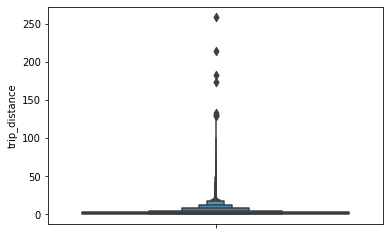

In [36]:
sns.boxenplot(y='trip_distance', data=frame_with_durations_speed_modified)

In [37]:
# it's not easy to interpret the box plot results so let's print percentile values
print("Percentile value for trip distance between 1 to 100 for interval 10")
print("+"*50)
get_percentile(frame_with_durations_speed_modified, 'trip_distance',0,100,10)


Percentile value for trip distance between 1 to 100 for interval 10
++++++++++++++++++++++++++++++++++++++++++++++++++
0th percentile value for trip_distance  : 0.01
10th percentile value for trip_distance  : 0.67
20th percentile value for trip_distance  : 0.9
30th percentile value for trip_distance  : 1.1
40th percentile value for trip_distance  : 1.39
50th percentile value for trip_distance  : 1.7
60th percentile value for trip_distance  : 2.08
70th percentile value for trip_distance  : 2.61
80th percentile value for trip_distance  : 3.6
90th percentile value for trip_distance  : 5.98


In [38]:
print("Percentile value for trip distance between 91 to 100 for interval 1")
print("+"*50)
get_percentile(frame_with_durations_speed_modified, 'trip_distance',91,100,1)


Percentile value for trip distance between 91 to 100 for interval 1
++++++++++++++++++++++++++++++++++++++++++++++++++
91th percentile value for trip_distance  : 6.47
92th percentile value for trip_distance  : 7.09
93th percentile value for trip_distance  : 7.87
94th percentile value for trip_distance  : 8.74
95th percentile value for trip_distance  : 9.6
96th percentile value for trip_distance  : 10.6
97th percentile value for trip_distance  : 12.1
98th percentile value for trip_distance  : 16.06
99th percentile value for trip_distance  : 18.18


In [39]:
print("Percentile value for trip distance between 99 to 100 for interval 0.1")
for i in np.arange(0.0,1.1,0.1):
    sorted_trip_dis_data = np.sort(frame_with_durations_speed_modified.trip_distance.values, axis=None)
    #formula  = x/100* len(data) 
    if i < 1:
        print("{}th percentile value for trip distance : {}".format(99+i,sorted_trip_dis_data [(int) (len(sorted_trip_dis_data)*float(99 + i)/100) ]))
    else:
        print("100th percentile value for trip distance : {}".format(sorted_trip_dis_data[-1]))

Percentile value for trip distance between 99 to 100 for interval 0.1
99.0th percentile value for trip distance : 18.18
99.1th percentile value for trip distance : 18.37
99.2th percentile value for trip distance : 18.6
99.3th percentile value for trip distance : 18.84
99.4th percentile value for trip distance : 19.14
99.5th percentile value for trip distance : 19.5
99.6th percentile value for trip distance : 19.97
99.7th percentile value for trip distance : 20.51
99.8th percentile value for trip distance : 21.23
99.9th percentile value for trip distance : 22.58
100th percentile value for trip distance : 258.9


### Observation:
    99.9th percentile for taxi trip distance is 22.58 miles in Newyork city, which is reasonable in NY City.
    Now we will remove all the trip distance beyound 99.9 percentile, which is not logical in NYC city.

In [40]:
frame_with_durations_speed_distance_modified = frame_with_durations_speed_modified[(frame_with_durations_speed_modified.trip_distance >= 0  ) & (frame_with_durations_speed_modified.trip_distance <= 22.58)]
frame_with_durations_speed_distance_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed,log_times
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319,2.893146
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193,2.987364
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269,2.307573
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429,0.624154
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378,2.960968


<AxesSubplot:ylabel='trip_distance'>

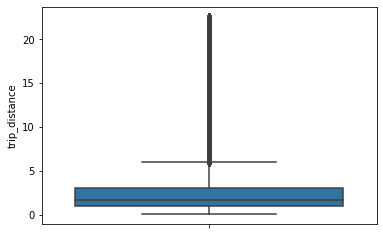

In [41]:
# Trip distance distribution after removal of outliers
sns.boxplot(y='trip_distance', data=frame_with_durations_speed_distance_modified)

## 6. Total Fare

<AxesSubplot:ylabel='total_amount'>

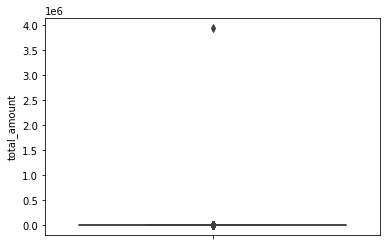

In [42]:
# Let's check for outliers using box plot
sns.boxplot(y='total_amount', data=frame_with_durations_speed_distance_modified)

In [43]:
# it's not easy to interpret the box plot results so let's print percentile values
print("Percentile value for trip fare between 1 to 100 for interval 10")
print("+"*50)
get_percentile(frame_with_durations_speed_distance_modified, 'total_amount',0,100,10)


Percentile value for trip fare between 1 to 100 for interval 10
++++++++++++++++++++++++++++++++++++++++++++++++++
0th percentile value for total_amount  : -242.55
10th percentile value for total_amount  : 6.35
20th percentile value for total_amount  : 7.8
30th percentile value for total_amount  : 8.8
40th percentile value for total_amount  : 9.8
50th percentile value for total_amount  : 11.16
60th percentile value for total_amount  : 12.8
70th percentile value for total_amount  : 14.8
80th percentile value for total_amount  : 18.3
90th percentile value for total_amount  : 25.8


    90th percentile value  25.8 USD is too less in City like New york City, let's check for 91th to 99th percentile

In [44]:
# it's not easy to interpret the box plot results so let's print percentile values
print("Percentile value for trip fare between 91 to 100 for interval 10")
print("+"*50)
get_percentile(frame_with_durations_speed_distance_modified, 'total_amount',91,100,1)


Percentile value for trip fare between 91 to 100 for interval 10
++++++++++++++++++++++++++++++++++++++++++++++++++
91th percentile value for total_amount  : 27.25
92th percentile value for total_amount  : 29.1
93th percentile value for total_amount  : 31.4
94th percentile value for total_amount  : 34.56
95th percentile value for total_amount  : 38.13
96th percentile value for total_amount  : 42.13
97th percentile value for total_amount  : 47.4
98th percentile value for total_amount  : 57.35
99th percentile value for total_amount  : 65.8


    99th percentile value 65.8 USD is still too less, you can easily expect higher fare price in New york city, let's check for percentile value between 99.1  to 100
    

In [45]:
print("Percentile value for trip fare between 99 to 100 for interval 10")
print("+"*50)
for i in np.arange(0.0,1.1,0.1):
    sorted_trip_fare_data = np.sort(frame_with_durations_speed_distance_modified.total_amount.values, axis=None)
    #formula  = x/100* len(data) 
    if i < 1:
        print("{}th percentile value for trip fare : {}".format(99+i,sorted_trip_fare_data [(int) (len(sorted_trip_fare_data)*float(99 + i)/100) ]))
    else:
        print("100th percentile value for trip fare : {}".format(sorted_trip_fare_data[-1]))

Percentile value for trip fare between 99 to 100 for interval 10
++++++++++++++++++++++++++++++++++++++++++++++++++
99.0th percentile value for trip fare : 65.8
99.1th percentile value for trip fare : 67.13
99.2th percentile value for trip fare : 68.6
99.3th percentile value for trip fare : 69.6
99.4th percentile value for trip fare : 69.69
99.5th percentile value for trip fare : 69.73
99.6th percentile value for trip fare : 69.76
99.7th percentile value for trip fare : 72.46
99.8th percentile value for trip fare : 74.88
99.9th percentile value for trip fare : 86.34
100th percentile value for trip fare : 3950611.6


* I spent more than **100 USD in New york City so 99.9 percentile value is also reasonably  less,** so we are not getting threshold values using 99.9 percentile so we will try to check this using observing last few large values and see if we can decide some thresholds to remove outliers
    

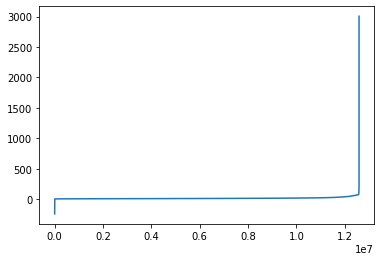

In [46]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
sorted_trip_fare_data = np.sort(frame_with_durations_speed_distance_modified.total_amount.values, axis=None)
    
plt.plot(sorted_trip_fare_data[:-2])
plt.show()

In [47]:
# 22.5% is decent number because given a 10minutes time cab driver just want 10 choices where he can move to maximize his ride. he donot want to move from one end of the city to other end( which he obviously cannot do in 10 minutes) even when he was sure there are high pickups there. at k=40 we have 40 clusters and driver has 9 options to move which is a good number. obviously every corner of the city cannot be less than 2 miles from where the driver is. so 31 options fall outside 2 miles range

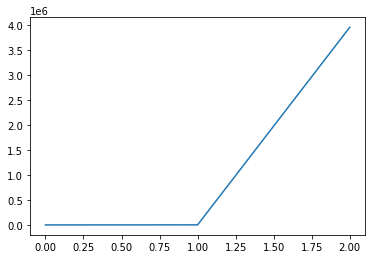

In [48]:
# Let's zoom out and obser only last 3 values

plt.plot(sorted_trip_fare_data[-3:])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

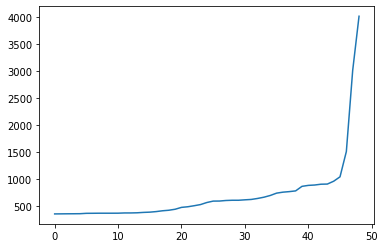

In [49]:
# observing top 50 highest trip fare amount

plt.plot(sorted_trip_fare_data[-50:-1])
plt.show

    After observing top 50 highest trip fare amount, we can see there is inflection point aroung 1000USD, 1000USD is reasonable fore any people to pay in NYC in critical condition. so we will remove all the trips having larger fare than 1000 as outliers


In [50]:
frame_with_durations_speed_distance_fare_modified = frame_with_durations_speed_distance_modified[(frame_with_durations_speed_distance_modified.total_amount >=0 ) 
                                                                                                & (frame_with_durations_speed_distance_modified.total_amount)<=1000]
frame_with_durations_speed_distance_fare_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed,log_times
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319,2.893146
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193,2.987364
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269,2.307573
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429,0.624154
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378,2.960968


In [51]:
# # delete variables and free Ram
del frame_with_durations_modified
del frame_with_durations_speed_modified
del frame_with_durations_speed_distance_modified
del frame_with_durations_speed_distance_fare_modified
del jan_2015_data
import gc
gc.collect()


21826

## Remove all outliers/erronous points.

In [52]:
def remove_outliers(df):
    print("Number of records in dataframe : {}".format(df.shape[0]))
    # remove Latitude and longitude errors and outliers
    a = df.shape[0]
    temp_frame = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                       (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                       ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                       (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))
    
    
    temp_frame = df[(df.trip_times > 0) & (df.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    temp_frame = df[(df.Speed <= 65) & (df.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = df[(df.total_amount <1000) & (df.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))

    del temp_frame
    
    df = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                       (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                       ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                       (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]
    
    df = df[(df.trip_times > 0) & (df.trip_times < 720)]
    df = df[(df.trip_distance > 0) & (df.trip_distance < 23)]
    df = df[(df.Speed < 45.31) & (df.Speed > 0)]
    df = df[(df.total_amount <1000) & (df.total_amount >0)]
    
    print ("Total outliers removed",a - df.shape[0])
    print ("---")
    
    return df
    
jan_month_update  = remove_outliers(jan_month_with_trip_duration)


Number of records in dataframe : 12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---


In [53]:
print ("Removing outliers in the month of Jan-2015")
print ("+"*50)
frame_with_outliers_removed = remove_outliers(jan_month_with_trip_duration)
print("fraction of data points that remain after removing outliers", float(len(frame_with_outliers_removed))/len(jan_month_with_trip_duration))
# del jan_month_with_trip_duration
# gc.collect()

Removing outliers in the month of Jan-2015
++++++++++++++++++++++++++++++++++++++++++++++++++
Number of records in dataframe : 12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


In [54]:
frame_with_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378


# Data Preparation

In [96]:
frame_with_outliers_removed.to_csv('frame_with_outliers_removed.csv', index=False)

## Clustering and Segmentation

    1) Why Clustering?
  

In [60]:
def find_regions(k, coords, frame_with_outliers_removed):
    """
    Get the Cluster centroid and length of clusters, 
    Devide the NYC city into Different clusters based on number of pickups
    
    Parameters:
    
        k = number of clusters for Kmeans algorithm
        coords =   Trip pick up location Latitude and Longitud  dataframe on which we want to clusters,
        frame_with_outliers_removed = dataframe on which we want to fit clustering algorithm
        
    Returns:
        
        Number of region centroid
    
    """
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=10000,random_state=42).fit(coords)
    # predict the cluster and create new feature pickup clusters
    frame_with_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centroids = kmeans.cluster_centers_
    cluster_len = len(cluster_centroids)
    return cluster_centroids, cluster_len


 


In [88]:
def get_cluster_statistics(cluser_centroids, cluster_len):
    
    """
    Get the avg number  cluster with inter-cluster distance > 2
    Get the avg number  cluster with inter-cluster distance < 2
    Get the minimum inter-cluster distance ( our constraint for good clustering is 0.5 miles)
    
    
    
    Parameters:
    
        cluser_centroids = centroid of each cluster in city
        cluster_len =  total number of clusters
        
    """
    
    
    print("Choosing the cluster of size : {} ".format(cluster_len))
    less_than_2_miles=[]
    more_than_2_miles=[]
    # set min_dist with some large value (1000 miles)
    min_dist = 1000
    for i in  range(0,cluster_len) :
        good_points=0
        violated_points=0
        for j in range(0, cluster_len):
            if i != j :
                # movable-type.co.uk/scripts/latlong.html
                # haversine distance
                centroid1 = cluser_centroids[i]
                centroid2 = cluser_centroids[j]
                distance_bw_centroids_in_meters = gpxpy.geo.haversine_distance(centroid1[0], centroid1[1],centroid2[0], centroid2[1])
                # haversine_distance will be in meters, so convert distance into miles  by deviding with 1.60934*1000.
                distance_bw_centroids_in_miles = distance_bw_centroids_in_meters/(1.60934*1000)
                min_dist = min(min_dist,distance_bw_centroids_in_miles)
                
                if distance_bw_centroids_in_miles <=2:
                    good_points+=1
                else:
                    violated_points+=1
                    
        less_than_2_miles.append(good_points)
        more_than_2_miles.append(violated_points)
        
    
    print("Final Result After Computation:")
    print("Avg Number of cluster with in vicinity [inter-cluster distance is < 2]  : {}".format(np.ceil(sum(less_than_2_miles)/len(less_than_2_miles))))
    print("Avg Number of cluster outside  vicinity [inter-cluster distance is >  2] : {}".format(np.ceil(sum(more_than_2_miles)/len(more_than_2_miles))))
    print("Minimum inter-cluster distance : {}".format(min_dist))
    print("+"*70)
    

In [ ]:
coords = frame_with_outliers_removed[['pickup_latitude', 'pickup_longitude']].values


In [93]:
# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less basically need to maintain balance between within vicinity
# and outside vicinity

for k in range(5,50,5):
    cluster_centroids, cluster_len = find_regions(k ,coords,frame_with_outliers_removed)
    get_cluster_statistics(cluster_centroids, cluster_len)

Choosing the cluster of size : 5 
Final Result After Computation:
Avg Number of cluster with in vicinity [inter-cluster distance is < 2]  : 1.0
Avg Number of cluster outside  vicinity [inter-cluster distance is >  2] : 4.0
Minimum inter-cluster distance : 1.9809613461922697
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Choosing the cluster of size : 10 
Final Result After Computation:
Avg Number of cluster with in vicinity [inter-cluster distance is < 2]  : 2.0
Avg Number of cluster outside  vicinity [inter-cluster distance is >  2] : 8.0
Minimum inter-cluster distance : 0.9403042157013325
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Choosing the cluster of size : 15 
Final Result After Computation:
Avg Number of cluster with in vicinity [inter-cluster distance is < 2]  : 3.0
Avg Number of cluster outside  vicinity [inter-cluster distance is >  2] : 12.0
Minimum inter-cluster distance : 0.7461051519778933
++++++++++++++++++++++++++++++

    Based on above analysis on different K values, we can use K = 35 with minimum inter cluster distance = 0.4744 looks good,
    we want clusters to be atleast apart more than 0.5, 0.47 looks good, and we don't want too  big or large inter cluster distance, so choice we need to make is K=35.

In [94]:
# Getting K = 35 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=35, batch_size=10000,random_state=0).fit(coords)
frame_with_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_outliers_removed[['pickup_latitude', 'pickup_longitude']])

In [95]:
frame_with_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,drop_times,Speed,pickup_cluster
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,1.421350e+09,5.285319,12
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,1.420923e+09,9.983193,14
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,1.420923e+09,10.746269,10
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,1.420922e+09,16.071429,6
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,1.420923e+09,9.318378,4


## Let's plot cluster centroid

In [102]:
clusters_centroids = kmeans.cluster_centers_
cluster_len = len(clusters_centroids)

map_nyc  = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

for i in range(cluster_len):
    folium.Marker(list((clusters_centroids[i][0],clusters_centroids[i][1])), popup=(str(clusters_centroids[i][0])+str(clusters_centroids[i][1]))).add_to(map_nyc)
map_nyc

### Observation:
 * This plot looks interesting and logical, We could see **lot's of cluster centroid in manhattan area** which make sense, it is one of the busiest place in world, lot's buisness operates in area.
 *  Other clusters are well seperated and far from each other

## Visualize Clusters

In [134]:
# Visualize Clusters
def visualize_cluster(df):
    nyc_logitudeBoundry = (-74.03, -73.75) 
    nyc_latitudeBoundry= (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(10.5, 8.5)
    fig.savefig('test2png.png', dpi=100)
    # s= marker_Size
    # lw = line width
    # c = marker colors
    from matplotlib.pyplot import figure
    
#     figure(figsize=(20, 15), dpi=80)

    ax.scatter(df.pickup_longitude.values[:100000], df.pickup_latitude.values[:100000], s=10, lw=0,
               c=df.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(nyc_logitudeBoundry)
    ax.set_ylim(nyc_latitudeBoundry)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()
    
    


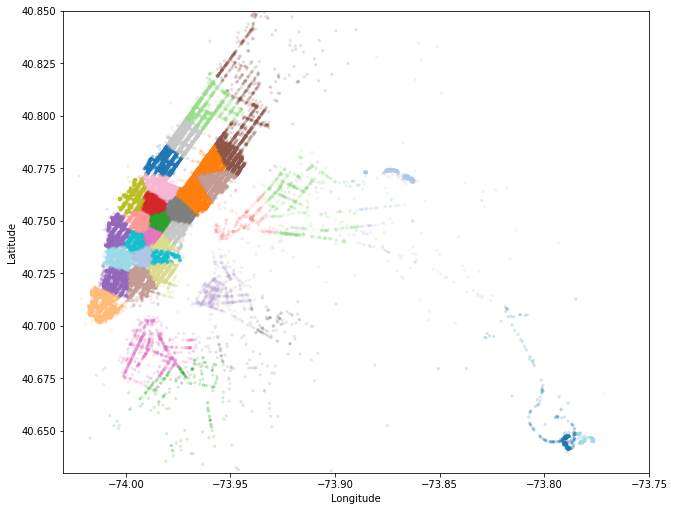

In [135]:
visualize_cluster(frame_with_outliers_removed)